## Plot varying autocorrelations

Useful to determine order of SARIMAX models. Also, information can be used for RandomForestRegressor (horizon window)

based on: https://github.com/MKB-Datalab/time-series-analysis-with-SARIMAX-and-Prophet/blob/master/notebooks/02-Forecasting_with_SARIMAX.ipynb

### Conclusion

It becomes clear that the datasets are barely autocorrelated. For the industrial dataset the daily is visible, and maybe there is a slightly larger peak at the weekyl seasonality.


In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


usable_data_folder = Path(r"C:\Users\Flin\OneDrive - TU Eindhoven\Flin\Flin\01 - Uni\00_Internship\Nokia\00_Programming\forecasting\datasets\train")

In [60]:
def lazy_plot(path, xlim=None, reduce_by=1):
    LAGS = int(7*2*24*4/reduce_by)

    if xlim is None:
        xlim = [None, None]

    assert isinstance(xlim, list) and len(xlim) == 2
    xlim = [xl if xl is None else int(xl) for xl in xlim]
    


    df = pd.read_csv(path)
    y = df["y"].diff().dropna()
    y = y.values
    
    y = y[xlim[0]:xlim[1]]
    y = y[::reduce_by]


        # Create figure
    fig, (ax0, ax1, ax2) = plt.subplots(3,1, figsize=(12,8))
    
    ax0.plot(y)
    ax0.set_title("Difference of Measurements")

    # Plot the ACF of df_store_2_item_28_timeon ax1
    plot_acf(y,lags=LAGS, zero=False, ax=ax1)

    # Plot the PACF of df_store_2_item_28_timeon ax2
    plot_pacf(y,lags=LAGS, zero=False, ax=ax2)

    fig.suptitle(f"rb={reduce_by}_{path.stem}")

    plt.show()

## RESIDENTIAL NO PV


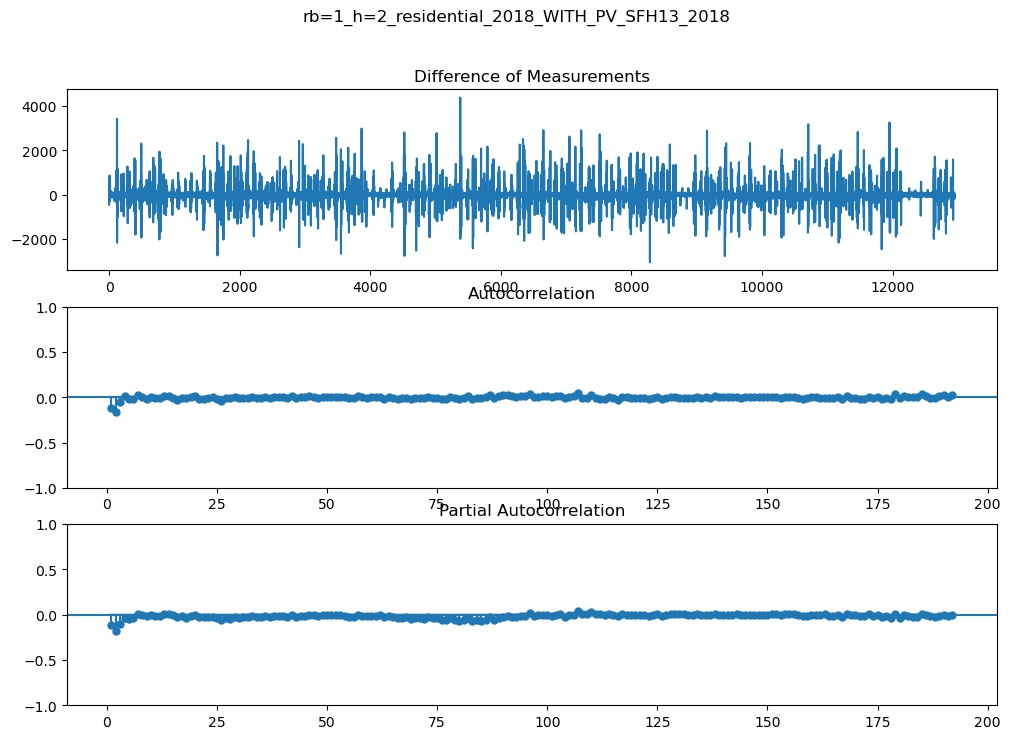

In [55]:
fn = r"residential_with_pv\h=2_residential_2018_WITH_PV_SFH13_2018.csv" # r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_plot(path, reduce_by=1)

## RESIDENTIAL WITH PV

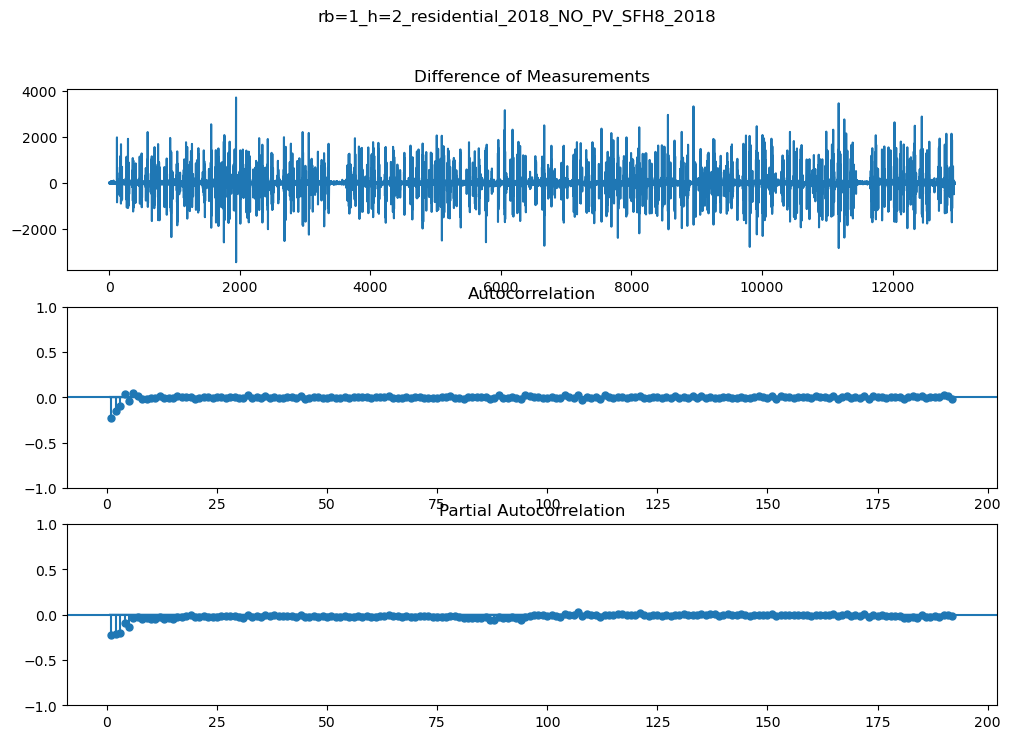

In [58]:
fn = r"residential_no_pv\h=2_residential_2018_NO_PV_SFH8_2018.csv" # r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_plot(path, reduce_by=1)

## INDUSTRIAL

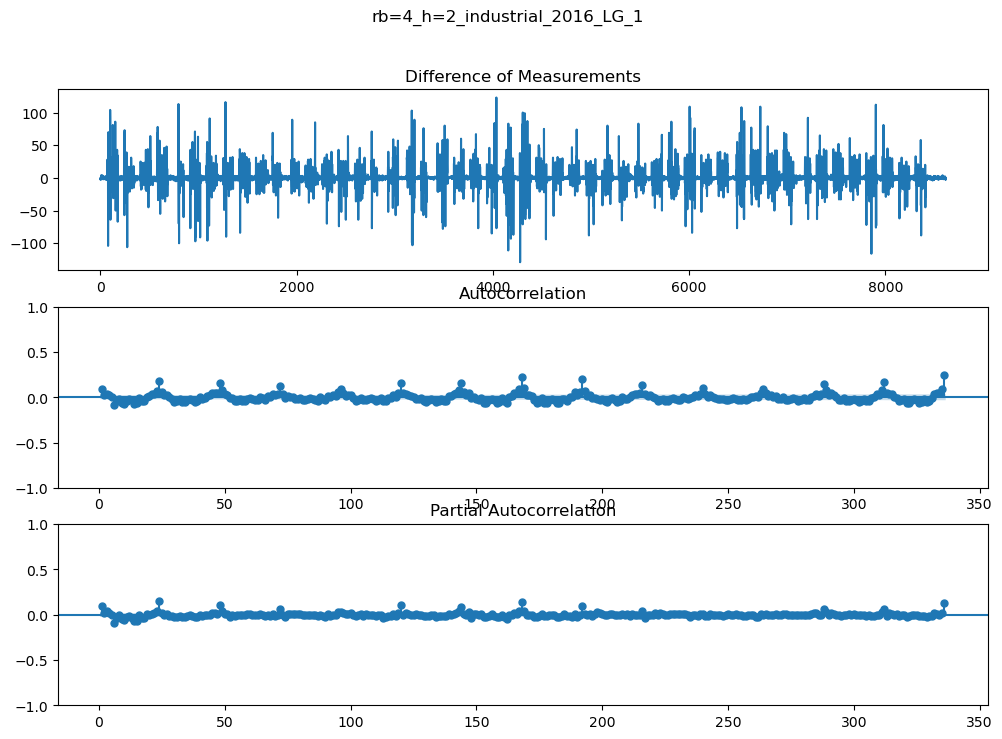

In [62]:
fn = r"industrial\h=2_industrial_2016_LG_1.csv"
path = usable_data_folder / fn

lazy_plot(path, xlim=[7*4*24, None], reduce_by=4)